## Assignment 1
#### Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

We will drop multiple columns like Name, jersey number, ID, Nationality, etc from the datset becuase these features doesn't defines a players performance and a machine learning algorithm on trained on such datasets would be biased and give wrong outcomes or predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv("FIFA _19.csv")   # The shape of the dataset is (18207, 89)

In [ ]:
#Displaying the first five rows of the dataset.
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Normal,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,Normal,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Lean,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# Checking for null values
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

#### Here is the function for preprocessing and transforming the dataset inorder to overcome the outlier and redundant values present in the dataset.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("FIFA _19.csv") # Importing the dataset
data_copy = data  #Creating a copy of the datset

#Defining the function
def data_transform(df):
    
# =================================================================================
#   Functions for transforming the columns of the dataset.
# =================================================================================
    
    # Removing the currency symbol, "M" and "K" from the monetary columns.
    def value_to_int(df_value):
        try:
            value = float(df_value[1:-1])
            suffix = df_value[-1:]
    
            if suffix == 'M':
                value = value * 1000000
            elif suffix == 'K':
                value = value * 1000
        except ValueError:
            value = 0
        return value

        
    #Turn Real Face into a binary indicator variable
    def face_to_num(df):
        if (df['Real Face'] == 'Yes'):
            return 1
        else:
            return 0
        
    #Turn Preferred Foot into a binary indicator variable
    def right_footed(df):
        if (df['Preferred Foot'] == 'Right'):
            return 1
        else:
            return 0
        
    #Removing the individual positioning score and assiging a postion to each player.
    def simple_position(df):
        if (df['Position'] == 'GK'):
            return 'GK'
        elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
            return 'DF'
        elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
            return 'DM'
        elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
            return 'MF'
        elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
            return 'AM'
        elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
            return 'ST'
        else:
            return df.Position

    
    
    #Apply changes to dataset to edit or create new column depending the functions.
        
        #Applying "value_to_int" fucntion
    df['Value'] = df['Value'].apply(value_to_int)
    df['Wage'] = df['Wage'].apply(value_to_int)
    
        #Applying "face_to_num" column.
    df['Real_Face'] = df.apply(face_to_num, axis=1)
    
        #Applying the "right_footed" function
    df['Right_Foot'] = df.apply(right_footed, axis=1)
    df['Preferred Foot'] = df.apply(right_footed,axis=1)
    
        #Applying the "simple_position" and assigning "ST" position for null values.
    df['Simple_Position'] = df.apply(simple_position,axis = 1) 
    df['Simple_Position'] = df['Simple_Position'].fillna("ST")
    
    
    #Split the Work Rate Column in two
    tempwork = df["Work Rate"].str.split("/ ", n = 1, expand = True) 
    #Create new column for first work rate
    df["WorkRate1"]= tempwork[0]   
    #Cre`ate new column for second work rate
    df["WorkRate2"]= tempwork[1]
    
    
    # Funtion droping the columns that are not required
    def drop_cols(df):
        df = df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
            'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
            'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],axis=1)
        
        df = df.drop(['Name','Photo','Nationality','Flag'],axis=1) 
        df = df.drop(['Club','Club Logo'],axis=1)
        df = df.drop(['Loaned From'],axis=1)
        df = df.drop(['Jersey Number','Position'],axis=1)
        df = df.drop(['ID'],axis=1)
        df = df.drop(['Real Face'],axis=1)
        df = df.drop(['Unnamed: 0'],axis=1)
        df = df.drop(['Joined','Contract Valid Until'],axis=1)
        df = df.drop(['Release Clause'],axis=1)
        df = df.drop(['Work Rate'],axis=1)
        df = df.drop(['Weight'],axis=1)
        
        return df
    
    # Applying the "drop_cols" function.
    df = drop_cols(df)
    
    # Dropping the rows with null value. This a large dataset so lossing some 
    # information won't cause much harm.
    missing_height = df[df['Height'].isnull()].index.tolist()
    df.drop(df.index[missing_height],inplace =True)


    # Creating dummies variables for categorical columns, basically 
    # one-hot encoding the categorical columns.
    dummies_1 = pd.get_dummies(df['Body Type'],drop_first=True)
    df = pd.concat([df.drop('Body Type',axis=1),dummies_1],axis=1)
    
    dummies_2 = pd.get_dummies(df['WorkRate1'],drop_first=True)
    df = pd.concat([df.drop('WorkRate1',axis=1),dummies_2],axis=1)

    dummies_3 = pd.get_dummies(df['WorkRate2'],drop_first=True)
    df = pd.concat([df.drop('WorkRate2',axis=1),dummies_3],axis=1)
    
    return df


new_data = data_tranform(data)
new_null = new_data.isnull().sum()


In [ ]:
# First 5 rows of the new dataset.
new_data.head()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Normal,Stocky,Low,Medium,Low,Medium
0,31,94,94,110500000.0,565000.0,2202,0,5.0,4.0,4.0,5'7,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,ST,1,0,0,1,0,1
1,33,94,94,77000000.0,405000.0,2228,1,5.0,4.0,5.0,6'2,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,ST,1,0,0,0,1,0
2,26,92,93,118500000.0,290000.0,2143,1,5.0,5.0,5.0,5'9,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,AM,0,0,0,0,0,1
3,27,91,93,72000000.0,260000.0,1471,1,4.0,3.0,1.0,6'4,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,GK,0,0,0,1,0,1
4,27,91,92,102000000.0,355000.0,2281,1,4.0,5.0,4.0,5'11,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,MF,1,0,0,0,0,0


In [ ]:
new_data.isnull().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Height                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positionin

In [ ]:
# Getting information of the new dataset.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18159 non-null  int64  
 1   Overall                   18159 non-null  int64  
 2   Potential                 18159 non-null  int64  
 3   Value                     18159 non-null  float64
 4   Wage                      18159 non-null  float64
 5   Special                   18159 non-null  int64  
 6   Preferred Foot            18159 non-null  int64  
 7   International Reputation  18159 non-null  float64
 8   Weak Foot                 18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Height                    18159 non-null  object 
 11  Crossing                  18159 non-null  float64
 12  Finishing                 18159 non-null  float64
 13  HeadingAccuracy           18159 non-null  float64
 14  ShortP

The resultant dataset is uniform with columns having equal number of rows.

As, we can see the function "data_transform" was able to transform the FIFA 19 dataset in a single execution with an efficent computing time. The dataset that the function return has no outliers like null values, reduntant values or values with  wrong data types. The dataset is ready for processing for machine learning but two columns that are "Height" and "Position" are of type "object". These columns can be removed or be used depending the task.

### ============================================================================================

## Assignment 2
#### Write a function in python that inputs a dataframe and identify which columns have date in them. Using these date columns make new columns which are difference between these columns taking 2 at a time.

In [ ]:
df_2 = pd.read_csv("NIFTY 50.csv")
df_2.head()

,Date_1,Open,High,Date_2,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,03-01-2000,1482.15,1592.90,03-01-2000,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
1,04-01-2000,1594.40,1641.95,04-01-2000,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2,05-01-2000,1634.55,1635.50,05-01-2000,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
3,06-01-2000,1595.80,1639.00,06-01-2000,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
4,07-01-2000,1616.60,1628.25,07-01-2000,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [ ]:
df_2.dtypes

Date_1        object
Open         float64
High         float64
Date_2        object
Low          float64
Close        float64
Volume       float64
Turnover     float64
P/E          float64
P/B          float64
Div Yield    float64
dtype: object

This is a sample stock dataset .In this dataset we have two columns date columns with same value and when we will substract them we should get zero as the answer.

In [ ]:
def date_diff(df):
    for col in df.columns:
        if df[col].dtype == 'object':                     # checking for object datatype in the dataset.
            try:
                df[col] = pd.to_datetime(df[col])         # *Coverting to "datetime" 
            except ValueError:
                pass                                      # non-date columns passed without type conversion.
    date_df = df.select_dtypes(include=[np.datetime64])   # selecting the datetime columns
    for i in date_df.values:                              # iteration through the values
        df['Date_Difference'] = i[0] - i[1]               # Finding differnce between two datetime columns
    return df

'''
* The line that converts the "object" type to datetime cannot convert any 
object type value. It will only convert the values that can possibly 
be converted to datetime format i.e. only the desired datetime realted columns will 
coverted into datetime format. In other words the line try to convert and if
not possible it will the "pass" the "object" type unchanged.
'''

'\n* The line that converts the "object" type to datetime cannot convert any \nojbect type value. It will only convert the values that can possibly \nbe converted to datetime format i.e. only the desired date related column will \ncovert into datetime format. In other words the line try to convert and if\nnot possible with "pass" the object unchanged\n'

In [ ]:
new_df = date_diff(df_2)

In [ ]:
new_df.head()

,Date_1,Open,High,Date_2,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,Date_Difference
0,2000-03-01,1482.15,1592.90,2000-03-01,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95,0 days
1,2000-04-01,1594.40,1641.95,2000-04-01,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92,0 days
2,2000-05-01,1634.55,1635.50,2000-05-01,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95,0 days
3,2000-06-01,1595.80,1639.00,2000-06-01,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94,0 days
4,2000-07-01,1616.60,1628.25,2000-07-01,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94,0 days


In [ ]:
new_df.dtypes

Date_1              datetime64[ns]
Open                       float64
High                       float64
Date_2              datetime64[ns]
Low                        float64
Close                      float64
Volume                     float64
Turnover                   float64
P/E                        float64
P/B                        float64
Div Yield                  float64
Date_Difference    timedelta64[ns]
dtype: object

So, we have a new column in the dateset "Date_Difference" which shows the difference between two dates and since the two date columns in the dataset here have the same values we will get the difference as zero.
But if different dates columns are passed in the function through a dffierent dataset to the "date_diff" function the user will get the desired difference between the dates.


### ============================================================================================

## Assignment 3
#### Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85

In [ ]:
dataset = pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# The correlation value with the columns
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


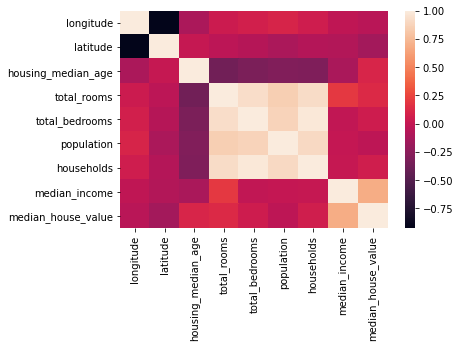

In [ ]:
# Visualization of the Correlation values 
sns.heatmap(dataset.corr())

#### Here is the function for dropping the columns with correlation higher than 0.85.

In [ ]:
def drop_corr(df):
    
    # Create correlation matrix
    corr_matrix = df.corr()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)
    return df
    

In [ ]:
new_dataset = drop_corr(dataset)

In [ ]:
# THe first 5 rows of the new dataset with columns all having Pearson correltion 
# lower than 0.85.
new_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Checking the Pearson Correlation values.
new_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.198050,0.134153
median_income,-0.015176,-0.079809,-0.119034,0.198050,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.688075,1.000000


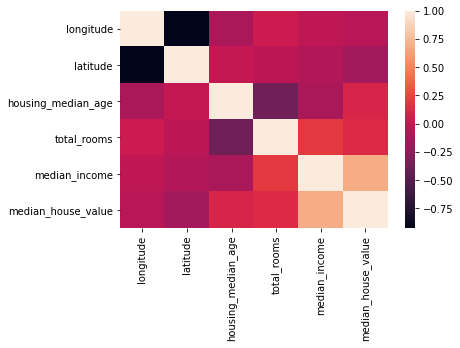

In [ ]:
# Heatmap for visualization of the new Pearson correation values.
sns.heatmap(new_dataset.corr())

As, we can see from the above heatmap that no column in the new dataset returned by the function "drop_corr" has Pearson Correlation higher than 0.85.
The correlations values are lower than 0.85 or exactly 1. Value is 1 for the correlation between the same columns.
Hence, we can say that the function work perfectly without dropping extra values.